MachineLeaningCourse vol.5
# 多項式回帰

これまでの内容は、説明変数と目的変数の関係が線形であることを前提としていました。

今回は、多項式の項が追加された多項式回帰モデルを使用します。

$$y = w_0 + w_1x + w_2x^2 + … + w_dx^d$$

ここで、dは多項式の次数を表します。多項式回帰を使って非線形関係をモデリングすることは可能だが、線形回帰の係数wについては線形であるため、重回帰モデルと見なされます。

次に、scikit-learnのPolynomialFeatures変換器クラスを使用して、説明変数が一つだけの単純な回帰問題に対して２次の項（d=2）を追加し、多項式回帰よ線形回帰を比較する方法について見よう。

手順は以下の通りです。

#### 多項式の２次の項を追加する

In [16]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.0, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
pr = LinearRegression()

# ２次の多項式特徴量のクラスをインスタンス化
pol = PolynomialFeatures(degree=2)

# データに適合させ、データを変換
X_pol = pol.fit_transform(X)

In [18]:
print("X　▼\n{}\n".format(X))
print("X_pol　▼\n{}".format(X_pol))

X　▼
[[ 258.]
 [ 270.]
 [ 294.]
 [ 320.]
 [ 342.]
 [ 368.]
 [ 396.]
 [ 446.]
 [ 480.]
 [ 586.]]

X_pol　▼
[[  1.00000000e+00   2.58000000e+02   6.65640000e+04]
 [  1.00000000e+00   2.70000000e+02   7.29000000e+04]
 [  1.00000000e+00   2.94000000e+02   8.64360000e+04]
 [  1.00000000e+00   3.20000000e+02   1.02400000e+05]
 [  1.00000000e+00   3.42000000e+02   1.16964000e+05]
 [  1.00000000e+00   3.68000000e+02   1.35424000e+05]
 [  1.00000000e+00   3.96000000e+02   1.56816000e+05]
 [  1.00000000e+00   4.46000000e+02   1.98916000e+05]
 [  1.00000000e+00   4.80000000e+02   2.30400000e+05]
 [  1.00000000e+00   5.86000000e+02   3.43396000e+05]]


#### 比較を可能にするために、単純な線形回帰モデルを学習させる

In [20]:
lr.fit(X, y)

X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

#### 多項式回帰のために、変換された特徴量で複数の回帰モデルを学習させる

In [21]:
pr.fit(X_pol, y)

y_quad_fit = pr.predict(pol.fit_transform(X_fit))

<function matplotlib.pyplot.show>

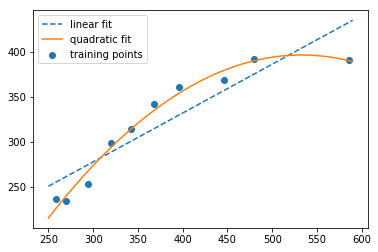

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')
plt.show

In [28]:
# R^2スコアの表示
print('R^2 LinearRegression : %.3f, PolynomialRegression : %.3f' % (lr.score(X, y), pr.score(X_pol, y)))

R^2 LinearRegression : 0.831, PolynomialRegression : 0.982


図と$R^2$スコアを見ると、２次の多項式モデルの法が、データセットにフィットしていることが分かります。

このように、多項式モデルは線形モデルでは表現できない曲線を描くことができるので、モデルの性能がより上がる場合が多いです。

では、前回と同様にbostonデータセットで学習していきましょう。

In [38]:
# データセットの読み込み
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split

# データセットを読み込み
housing = load_boston()
columns = housing.feature_names

# Pandasのデータフレームに変換
boston = pd.DataFrame(housing.data, columns=columns)

# 目的変数をDataFrameへ変換
boston['MEDV'] = np.array(housing.target)
columns = list(columns)
columns.append('MEDV')

# 説明変数
X = boston.loc[:, ['LSTAT']].values
# 目的変数
y = boston.loc[:, 'MEDV'].values

#### 多項式の特徴量を作成

In [39]:
# １次変数を作成するインスタント
mod = LinearRegression()

# 2次（までの）変数を作成するインスタンス
quadratic = PolynomialFeatures(degree = 2)

# 3次（までの）変数を作成するインスタンス
cubic = PolynomialFeatures(degree = 3)

# 変数作成
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#### 多項式モデルの作成

In [50]:
# モデル式用に変数を作成
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

# 線形回帰モデル、予測値、R^2を評価
mod_lin = mod.fit(X, y)
y_lin_fit = mod_lin.predict(X_fit)
r2_lin = mod.score(X, y)

# 2次の項を追加、予測値、R^2を評価
mod_quad = mod.fit(X_quad, y)
y_quad_fit = mod_quad.predict(quadratic.fit_transform(X_fit))
r2_quad = mod.score(X_quad, y)

# 3次の項を追加、予測値、R^2を評価
mod_cubic = mod.fit(X_cubic, y)
y_cubic_fit = mod_cubic.predict(cubic.fit_transform(X_fit))
r2_cubic = mod.score(X_cubic, y)

#### 各モデルの結果をプロット

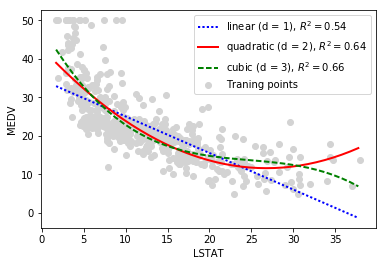

In [56]:
# データ点をプロット
plt.scatter(X, y, label = 'Traning points', color = 'lightgray')

# 線形モデルのモデル式
plt.plot(X_fit, y_lin_fit, 
         label = 'linear (d = 1), $R^2=%.2f$' % r2_lin,
         color = 'blue', lw = 2, linestyle = ':')

# 2次
plt.plot(X_fit, y_quad_fit, 
         label = 'quadratic (d = 2), $R^2=%.2f$' % r2_quad, 
         color = 'red', lw = 2, linestyle = '-')

# 3次
plt.plot(X_fit, y_cubic_fit, 
         label = 'cubic (d = 3), $R^2=%.2f$' % r2_cubic,
         color = 'green', lw = 2, linestyle = '--')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc = 'upper right')
plt.show()

#### クロスバリデーションで検証

In [57]:
# 必要なメソッドのインポート
from sklearn.cross_validation import train_test_split

# 学習用70%、検証用30%に分割
X_train, X_test, y_train, y_test= train_test_split(X, y ,test_size = 0.3, random_state = 0)
X_quad_train, X_quad_test, y_train, y_test = train_test_split(X_quad, y , test_size = 0.3, random_state = 0)
X_cubic_train, X_cubic_test, y_train, y_test = train_test_split(X_cubic, y , test_size = 0.3, random_state = 0)

#### 1次元モデル作成

In [58]:
mod.fit(X_train, y_train)
y_train_pred = mod.predict(X_train)
y_test_pred = mod.predict(X_test)

# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (mod.score(X_train, y_train), mod.score(X_test, y_test)))

R^2 Train : 0.552, Test : 0.522


#### ２次元モデル作成

In [60]:
mod.fit(X_quad_train, y_train)
y_train_pred = mod.predict(X_quad_train)
y_test_pred = mod.predict(X_quad_test)

# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (mod.score(X_quad_train, y_train), mod.score(X_quad_test, y_test)))

R^2 Train : 0.658, Test : 0.596


#### ３次元モデル作成

In [62]:
mod.fit(X_cubic_train, y_train)
y_train_pred = mod.predict(X_cubic_train)
y_test_pred = mod.predict(X_cubic_test)

# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (mod.score(X_cubic_train, y_train), mod.score(X_cubic_test, y_test)))

R^2 Train : 0.675, Test : 0.615


それに加えて、非線形関係をモデリングするにあったて、多項式の特徴量は必ずしも最良の選択肢であるとは限らないです。

たとえば、MEDVとLSTATの散布図を見てみると、LSTAT変数の対数とMEDV変数の平方根により、線形回帰モデルの学習に適した線形特徴空間に対して、データを射影できるように思える。

以下のコードを使ってこの仮説をテストしてみよう。

### 他の非線形効果

多項式以外の投入方法として、指数、対数、平方根をとるといった方法があります。

今回のデータだと、LSTATの対数をとり、MEDVの平方根をとる、という操作を行うとよりモデルの当てはまりがより向上します。結果をプロットすると以下のようになります。

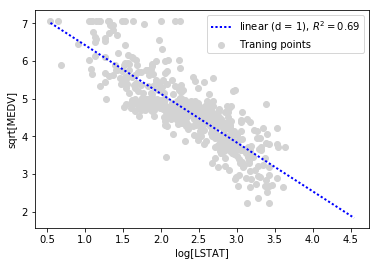

In [64]:
# 非線形変換
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# 線形回帰モデル作成、R^2計算
X_fit = np.arange(X_log.min(), X_log.max() + 1, 1)[:, np.newaxis]
mod_log = mod.fit(X_log, y_sqrt)
y_sqrt_fit = mod_log.predict(X_fit)
r2_sqrt = mod.score(X_log, y_sqrt)

# プロット
plt.scatter(X_log, y_sqrt, label = 'Traning points', color = 'lightgray')
plt.plot(X_fit, y_sqrt_fit, 
         label = 'linear (d = 1), $R^2=%.2f$' % r2_sqrt,
         color = 'blue', lw = 2, linestyle = ':')
plt.xlabel('log[LSTAT]')
plt.ylabel('sqrt[MEDV]')
plt.legend(loc = 'upper right')
plt.show()

$R^2=0.69$ となっており、今回考慮したモデルの中では最も高い数値になっています。

### まとめ
非線形なものを導入すると、モデルの表現力が上がりデータに対してよりフィットするようになります。

一方で過学習しやすくなるというデメリットもあるので、そこのトレードオフを意識していく必要があります。